CSV file not found. Creating a sample dataset...
Air Quality Model - MSE: 8714.59, R²: -0.20
Water Quality Model - MSE: 1097.66, R²: -0.21


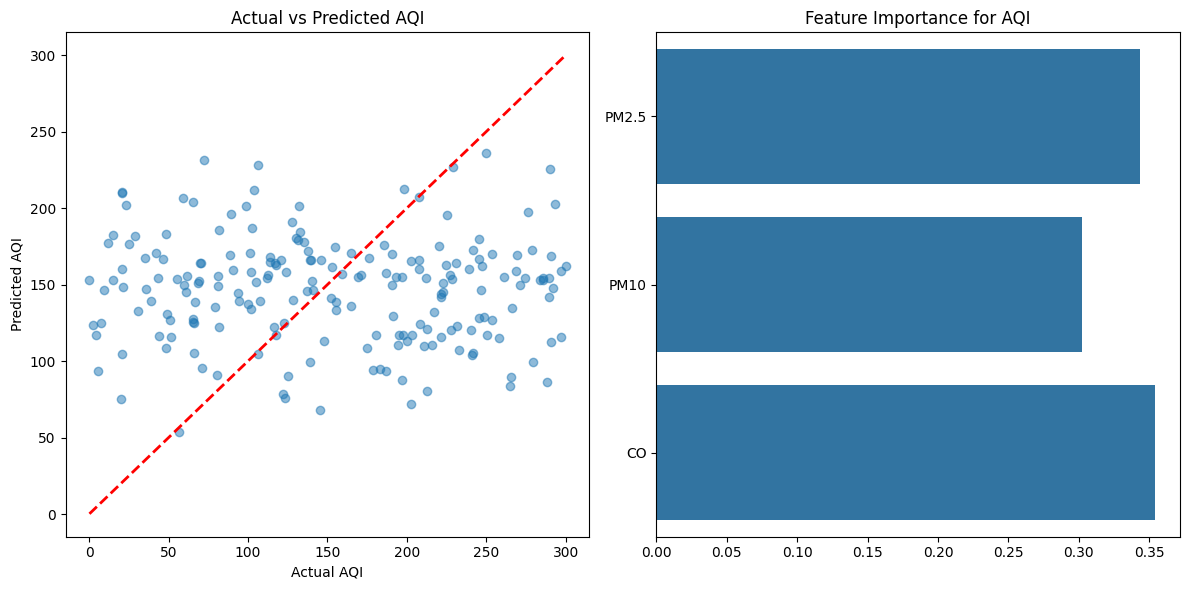

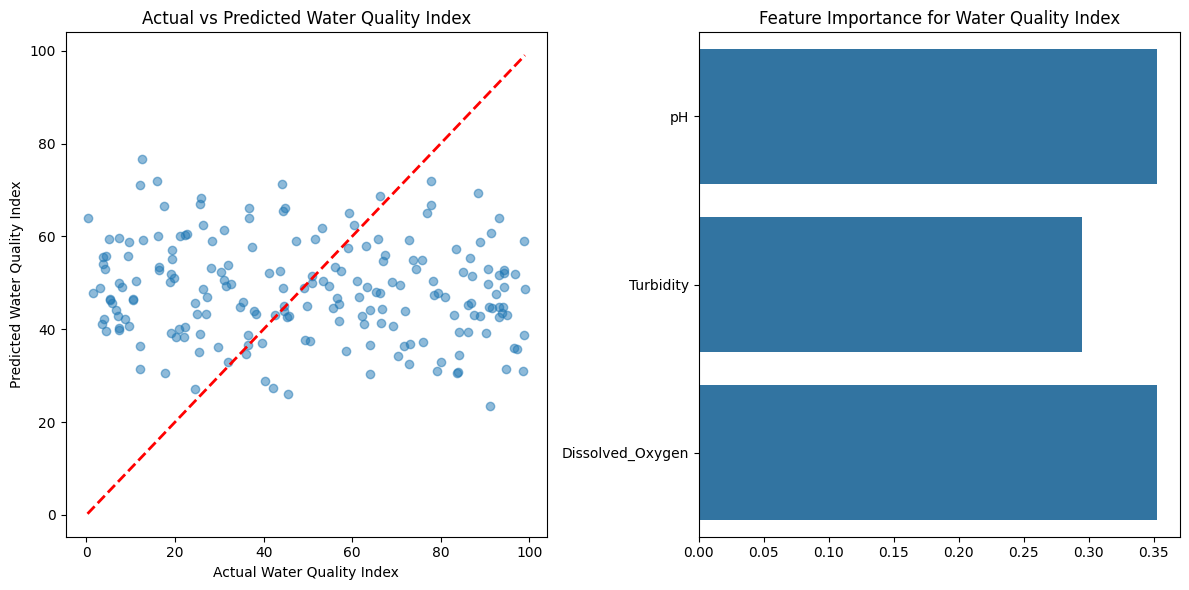

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# 1. Load and preprocess the CSV file
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except FileNotFoundError:
        print("CSV file not found. Creating a sample dataset...")
        # Create a sample dataset if CSV is not provided
        data = pd.DataFrame({
            'PM2.5': np.random.uniform(0, 100, 1000),
            'PM10': np.random.uniform(0, 150, 1000),
            'CO': np.random.uniform(0, 10, 1000),
            'AQI': np.random.uniform(0, 300, 1000),
            'pH': np.random.uniform(6, 9, 1000),
            'Turbidity': np.random.uniform(0, 100, 1000),
            'Dissolved_Oxygen': np.random.uniform(0, 10, 1000),
            'Water_Quality_Index': np.random.uniform(0, 100, 1000)
        })
        data.to_csv('environmental_data.csv', index=False)
        return data

# 2. Preprocess data
def preprocess_data(data):
    # Check for missing values
    data = data.fillna(data.mean())
   
    # Features and targets
    air_features = ['PM2.5', 'PM10', 'CO']
    water_features = ['pH', 'Turbidity', 'Dissolved_Oxygen']
    air_target = 'AQI'
    water_target = 'Water_Quality_Index'
   
    X_air = data[air_features]
    y_air = data[air_target]
    X_water = data[water_features]
    y_water = data[water_target]
   
    return X_air, y_air, X_water, y_water

# 3. Train ML model
def train_model(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
   
    # Predictions
    y_pred = model.predict(X_test)
   
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")
   
    return model, X_test, y_test, y_pred

# 4. Plot results
def plot_results(X_test, y_test, y_pred, features, target_name):
    plt.figure(figsize=(12, 6))
   
    # Scatter plot of actual vs predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Actual vs Predicted {target_name}")
   
    # Feature importance
    plt.subplot(1, 2, 2)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_test, y_test)
    importance = model.feature_importances_
    sns.barplot(x=importance, y=features)
    plt.title(f"Feature Importance for {target_name}")
   
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load data
    file_path = 'environmental_data.csv'
    data = load_data(file_path)
   
    # Preprocess
    X_air, y_air, X_water, y_water = preprocess_data(data)
   
    # Train and evaluate air quality model
    air_model, X_test_air, y_test_air, y_pred_air = train_model(X_air, y_air, "Air Quality Model")
   
    # Train and evaluate water quality model
    water_model, X_test_water, y_test_water, y_pred_water = train_model(X_water, y_water, "Water Quality Model")
   
    # Plot results
    plot_results(X_test_air, y_test_air, y_pred_air, ['PM2.5', 'PM10', 'CO'], "AQI")
    plot_results(X_test_water, y_test_water, y_pred_water, ['pH', 'Turbidity', 'Dissolved_Oxygen'], "Water Quality Index")

if __name__ == "__main__":
    main()
